In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data1 = np.loadtxt('/home/ryan/projects/Medvedev/dm_sims/genPK/run_L3N256/PK-DM-snap_003_2cDM.hdf5')
data2 = np.loadtxt('/home/ryan/projects/Medvedev/dm_sims/genPK/run_L3N256_lower_softening/PK-DM-snap_003_2cDM.hdf5')

In [4]:
bins1 = data1[:,0]
pk1 = data1[:,1]

bins2 = data2[:,0]
pk2 = data2[:,1]

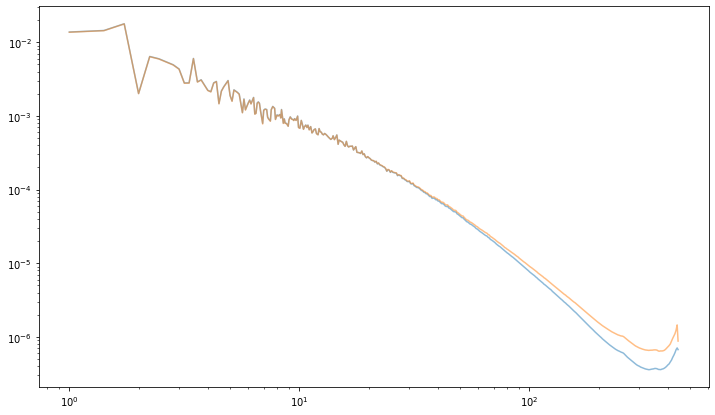

In [6]:
fig, ax = plt.subplots(figsize=[12,7])
ax.plot(bins1, pk1, alpha=0.5)
ax.plot(bins2, pk2, alpha=0.5)

ax.set_xscale('log')
ax.set_yscale('log')


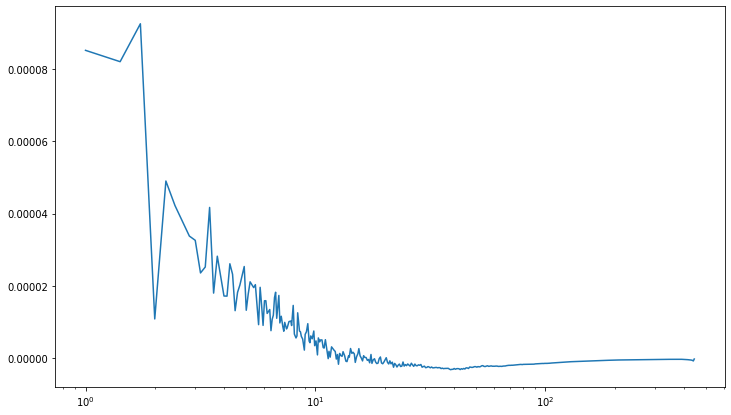

In [9]:
fig, ax = plt.subplots(figsize=[12,7])
ax.plot(bins1, pk1 - pk2)
#ax.plot(bins2, pk2, alpha=0.5)

ax.set_xscale('log')
#ax.set_yscale('log')